In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from will import detect

In [2]:
# Define directories for the data
data_dir_scattered = "simulated_scattered_bursts"
data_dir_simple = "simulated_bursts"

# Lists to store lightcurves
lightcurves_scattered = []
lightcurves_simple = []

# Loop through files in the scattered burst directory
for filename in os.listdir(data_dir_scattered):
    if filename.endswith(".npy"):
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(data_dir_scattered, filename))

        # Calculate the lightcurve
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

        # Append the lightcurve to the list
        lightcurves_scattered.append(lightcurve)

# Loop through files in the simple burst directory
for filename in os.listdir(data_dir_simple):
    if filename.endswith(".npy"):
        # Load the dynamic spectra from the numpy array
        dynamic_spectra_w_pulse = np.load(os.path.join(data_dir_simple, filename))

        # Calculate the lightcurve
        lightcurve = np.sum(dynamic_spectra_w_pulse, axis=1)

        # Append the lightcurve to the list
        lightcurves_simple.append(lightcurve)

# Convert the lists to flat arrays
lightcurves_scattered = np.array(lightcurves_scattered)
lightcurves_simple = np.array(lightcurves_simple)


In [3]:
# Combine the two datasets into one
combined_data = np.concatenate((lightcurves_scattered, lightcurves_simple), axis=0)

# Reshape the combined data for PCA
combined_data_2d = combined_data.reshape(-1, 1024)

combined_data_2d.shape

(200, 1024)

In [4]:
# Apply PCA to the combined data
n_components = 2  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)

In [5]:
pca1 = pca.transform(lightcurves_scattered)
pca2 = pca.transform(lightcurves_simple)

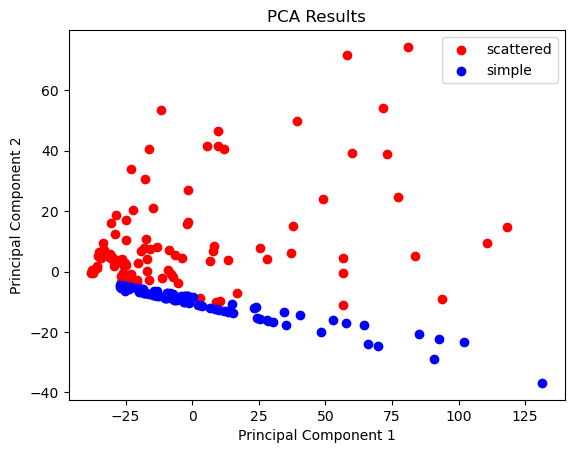

In [6]:
# Scatter plot for PCA results in red for 'scattered'
plt.scatter(pca1[:, 0], pca1[:, 1], c='r', label='scattered')

# Scatter plot for PCA results in blue for 'simple'
plt.scatter(pca2[:, 0], pca2[:, 1], c='b', label='simple')

# Set axis labels
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

# Set a title for the plot
plt.title('PCA Results')

# Display a legend to differentiate the two datasets
plt.legend()

# Show the plot
plt.show()

In [7]:
# Apply PCA to the combined data
n_components = 3  # You can adjust the number of components as needed
pca = PCA(n_components=n_components)
fit = pca.fit(combined_data_2d)
transformed_fit = pca.fit_transform(combined_data_2d)

pca1 = pca.transform(lightcurves_scattered)
pca2 = pca.transform(lightcurves_simple)

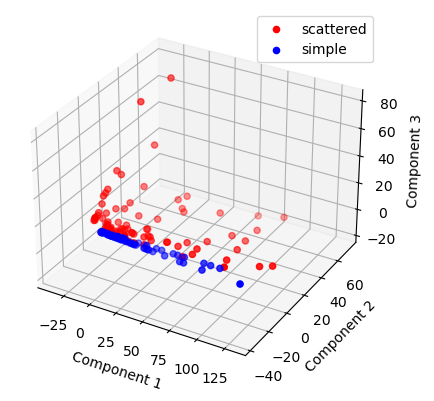

In [8]:
# PCA results pca1 and pca2 with three components each
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for pca1
ax.scatter(pca1[:, 0], pca1[:, 1], pca1[:, 2], c='r', label='scattered')

# Scatter plot for pca2
ax.scatter(pca2[:, 0], pca2[:, 1], pca2[:, 2], c='b', label='simple')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.legend()
plt.show()